# Capstone Project - The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
*Author: Henrique M. L. Pereira*

This is the final part of Coursera Capstone Project. In this notebook I'll describe the problem at hand, 
explain why it is important, and explain how and where i'll retrieve the data needed to accomplish my objective.
I am asked to use location data to explore geographical locations (New York, Toronto or another city of my choice)
using Foursquare location data, to be creative and find a possible problem that can be solved with this approach.

## Table of Contents
* [Introduction](#introduction)
* [Data and Methodology](#data)
* [Data Exploration](#exploration)
* [Results and Discussion](#discussion)
* [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>
Everyone has faced or will face, some time of their life, a difficult decision to make: i.e. get or not get married, move
away from your parent's house to your own place, have ou not have kids, enroll or not in that awesome course, etc...

The situation I present might as well be a one of particular difficulty, mostly due to the challenge it may present. Let's
imagine that you, as an entrepreneur, creative professional, and keen on producing innovative products, decide (along with
some good and daring colleagues) to start a StartUp company. You are offered some help to establish an office in only 5 cities,
all of them away from your hometown and also your colleagues' hometown.

Let's define further our problem.

### 1.1 Problem Definition <a name="problem"></a>
The 5 cities are major hubs in Portugal, diverse in all the ways, financial, economic, artistic, academic, full of opportunities, etc...
The 5 cities were selected using data from the Nomad List, and are classified as good cities to establish a startup. These are 'LISBOA', 'PORTO', 'COIMBRA', 'BRAGA', 'AVEIRO'.

Your StartUp, and it's work, may be defined by the following keywords:
* Innovative;
* Culturally impacting;
* Environment friendly;
* Information Technology;
* Game changing;
* Daring designs and approaches;

You and your colleagues have the following concerns and needs (with no particular order):
* Affordability of office and living;
* Multicultural environment;
* Near essential commodities;
* Near places to relax and meet people
* Always wanted to live in a buzzing city but without stressing situations;

### 1.2 Objective <a name="Objective"></a>
My objective is, with Data Science and Machine Learning, to advise the best city and neighborhood to set up said StartUp
company based on the factors above specified, as well all the data from these cities that will be retrieved dinamically.

## 2. Data <a name="data"></a>
Every data used in the project will be either stored in the resources folder of the GitHub repository associated with this project,
or be available in the internet.

I'll use the data related to the cities of Portugal from official Portuguese Government open source information. 
I'll also use data from the "Nomad List" ( https://nomadlist.com/ ) to rank the cities so I can put similarities and dissimilarities in perspective when comparing selected neighborhoods.

In [1]:
# import of relevant packages
import pandas as pd
import urllib.request
import json
from pandas.io.json import json_normalize
import re
from geopy.geocoders import Nominatim
import geocoder
import requests
from bs4 import BeautifulSoup as bs
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('Libraries imported...')
%matplotlib inline

Libraries imported...


### 2.1 Scrapping of data from Nomad List
This data is intended to further help on selecting the best place for the startup. I'm expecting to have matches between
neighborhoods of all cities, so this is the best objective way to select an appropriate neighborhood or at least the
top best ones.

In [2]:
# Define the list of Cities
list_cities = ['lisbon', 'porto', 'coimbra', 'braga', 'aveiro']
content = []
col_data = []
# Scrapping data
try:
    for i, c in enumerate(list_cities):
        time.sleep(random.choice(np.linspace(1, 5))) # a random delayer to avoid blocking
        req_parsed = bs(requests.get('https://nomadlist.com/{}'.format(c)).text, 'html.parser')
        #Find relevant information and store it
        table = req_parsed.find('table',{'class':'details'})
        fullrows = []
        for row in table.find_all('tr'):
            col = row.find_all('td')
            fullrows.append([row.text for row in col])
            fullrows[-1][0] = re.sub('\W', '', fullrows[-1][0])
            fullrows[-1][1] = re.sub('\W', ' ', fullrows[-1][1])
        fullrows.append(['City', list_cities[i]])
        row_data = np.array(fullrows).T.tolist()[1]
        col_data = np.array(fullrows).T.tolist()[0]
        fulldata = pd.DataFrame(row_data).T
        fulldata.columns = col_data
        content.append(fulldata)
    print('Done!')
except:
    print('Something went wrong...')

Done!


In [3]:
# constructing final df
NL_cities = pd.concat(content, axis=0, sort=False).reset_index(drop=True)
NL_cities

,NomadScore,Cost,Internet,Fun,Temperaturenow,Humiditynow,Airqualitynow,Safety,Qualityoflife,Peopledensity,Walkability,Peace,Trafficsafety,Hospitals,Happiness,Nightlife,FreeWiFiincity,Placestoworkfrom,ACorheating,Friendlytoforeigners,Englishspeaking,Freedomofspeech,Racialtolerance,Femalefriendly,LGBTfriendly,StartupScore,City
0,4 12 5214 reviews,Affordable 2 312 mo,Fast 15Mbps avg,Good,Perfect 26 C78 F,Humid 70,Great 22 µg m3,Good,Good,Not busy 6k ppl km² 12x12m,Great,Good,Okay,Bad,Okay,Okay,Okay,Great,Okay,Good,Good,Great,Okay,Good,Good,Okay,lisbon
1,3 25 5202 reviews,Affordable 2 229 mo,Fast 18Mbps avg,Good,Nice 21 C71 F,Way too humid 86,NaN,Good,Good,NaN,Great,Good,Okay,Bad,Okay,Okay,Good,Great,Great,Good,Okay,Great,Okay,Good,Okay,Okay,porto
2,2 13 5188 reviews,Too expensive 4 714 mo,Fast 18Mbps avg,Okay,Perfect 25 C77 F,Too humid 76,Great 16 µg m3,Good,Good,NaN,Great,Good,Okay,Bad,Okay,Okay,Okay,Great,Great,Good,Great,Great,Okay,Great,Bad,Bad,coimbra
3,3 17 5183 reviews,Affordable 1 803 mo,Fast 18Mbps avg,Bad,Perfect 26 C78 F,Too humid 78,NaN,Great,Good,NaN,Great,Good,Okay,Bad,Okay,Okay,Great,Great,Okay,Great,Okay,Great,Okay,Good,Okay,Okay,braga
4,2 96 5189 reviews,Affordable 2 437 mo,Fast 18Mbps avg,Great,Perfect 22 C72 F,Too humid 85,Great 16 µg m3,Great,Good,NaN,Great,Good,Okay,Bad,Okay,Okay,Bad,Great,Okay,Great,Okay,Great,Okay,Good,Okay,Okay,aveiro


In [4]:
# now some data clean up
for col in NL_cities.columns:
    NL_cities[col] = NL_cities[col].fillna(NL_cities[col].dropna(axis=0).mode()[0])

corresp = {'Great':5, 'Good':4, 'Okay':3, 'Bad':1}

NL_cities['NomadScore'] = NL_cities['NomadScore'].astype('str').\
    replace(r'\s\d+\s\w+$', '', regex=True).\
    replace(r'\s', '.', regex=True).astype('float')

NL_cities['Cost'] = NL_cities['Cost'].astype('str').\
    replace(r'[A-z]\s*', '', regex=True).replace(r'\s', '', regex=True).astype('int')

NL_cities['Internet'] = NL_cities['Internet'].astype('str').\
    replace(r'[A-z]\s*', '', regex=True).astype('int')

NL_cities['Temperaturenow'] = NL_cities['Temperaturenow'].astype('str').\
    replace(r'[^0-9]', '', regex=True).\
    replace(r'[0-9]{2}$', '', regex=True).astype('int')

NL_cities['Humiditynow'] = NL_cities['Humiditynow'].astype('str').\
    replace(r'[^0-9]', '', regex=True).\
    replace(r'[0-9]{1}$', '', regex=True).astype('int')
     
NL_cities['Airqualitynow'] = NL_cities['Airqualitynow'].astype('str').\
    replace(r'[^0-9]{2}.', '', regex=True).astype('float')

list_cols = ['Fun','Safety', 'Qualityoflife', 'Walkability', 
           'Peace', 'Trafficsafety', 'Hospitals', 
           'Happiness', 'Nightlife', 'FreeWiFiincity', 
           'Placestoworkfrom', 'ACorheating', 
           'Friendlytoforeigners', 'Englishspeaking', 
           'Freedomofspeech', 'Racialtolerance', 
           'Femalefriendly', 'LGBTfriendly', 'StartupScore']
for col in list_cols:
    NL_cities[col] = NL_cities[col].replace(corresp).astype('int')

NL_cities['Peopledensity'] = NL_cities['Peopledensity'].astype('str').\
    replace(r'k.*', '000', regex=True).replace(r'\w*\s+', '', regex=True).astype('int')

NL_cities = NL_cities.rename(columns={'Cost':'CostPerMonth',
                                      'Internet':'Internet_Mbps_avg',
                                      'Weather':'WeatherCelsiusNow',
                                      'Airqualitynow':'Airqualitynow_mcg_cubicm',
                                      'Peopledensity':'Peopledensity_sqrKm'})

cols = NL_cities.columns.tolist()
cols = cols[-1:] + cols[:-1]
NL_cities = NL_cities[cols]
NL_cities['City'] = NL_cities['City'].str.upper().replace('LISBON', 'LISBOA') 

Finally I have a clean and final Dataframe about all the cities.

In [5]:
NL_cities.to_csv('resources_battle_n/NL_cities.csv')
NL_cities

,City,NomadScore,CostPerMonth,Internet_Mbps_avg,Fun,Temperaturenow,Humiditynow,Airqualitynow_mcg_cubicm,Safety,Qualityoflife,Peopledensity_sqrKm,Walkability,Peace,Trafficsafety,Hospitals,Happiness,Nightlife,FreeWiFiincity,Placestoworkfrom,ACorheating,Friendlytoforeigners,Englishspeaking,Freedomofspeech,Racialtolerance,Femalefriendly,LGBTfriendly,StartupScore
0,LISBOA,4.12,2312,15,4,26,7,22.0,4,4,6000,5,4,3,1,3,3,3,5,3,4,4,5,3,4,4,3
1,PORTO,3.25,2229,18,4,21,8,16.0,4,4,6000,5,4,3,1,3,3,4,5,5,4,3,5,3,4,3,3
2,COIMBRA,2.13,4714,18,3,25,7,16.0,4,4,6000,5,4,3,1,3,3,3,5,5,4,5,5,3,5,1,1
3,BRAGA,3.17,1803,18,1,26,7,16.0,5,4,6000,5,4,3,1,3,3,5,5,3,5,3,5,3,4,3,3
4,AVEIRO,2.96,2437,18,5,22,8,16.0,5,4,6000,5,4,3,1,3,3,1,5,3,5,3,5,3,4,3,3


Let's scale data between 1 and 0 to use it further to rank these cities.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
NL_cities_norm = pd.DataFrame(scaler.fit(NL_cities.set_index('City')).transform(NL_cities.set_index('City')), columns=NL_cities.set_index('City').columns)
NL_cities_norm['City'] = NL_cities['City']
NL_cities_norm = NL_cities_norm.set_index('City').reset_index()

In [7]:
NL_cities_norm

,City,NomadScore,CostPerMonth,Internet_Mbps_avg,Fun,Temperaturenow,Humiditynow,Airqualitynow_mcg_cubicm,Safety,Qualityoflife,Peopledensity_sqrKm,Walkability,Peace,Trafficsafety,Hospitals,Happiness,Nightlife,FreeWiFiincity,Placestoworkfrom,ACorheating,Friendlytoforeigners,Englishspeaking,Freedomofspeech,Racialtolerance,Femalefriendly,LGBTfriendly,StartupScore
0,LISBOA,1.000000,0.174854,0.0,0.75,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.000000,1.0
1,PORTO,0.562814,0.146341,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0
2,COIMBRA,0.000000,1.000000,1.0,0.50,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0
3,BRAGA,0.522613,0.000000,1.0,0.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,1.0
4,AVEIRO,0.417085,0.217795,1.0,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,1.0


I'll remove now the variables that are not interesting to our startup:

In [8]:
columns_to_remove = ['Internet_Mbps_avg','Nightlife','FreeWiFiincity','Placestoworkfrom','ACorheating','Temperaturenow','Humiditynow',
                     'Airqualitynow_mcg_cubicm','Friendlytoforeigners','Englishspeaking','Freedomofspeech','Racialtolerance','Femalefriendly','LGBTfriendly',]
NL_cities = NL_cities.drop(columns_to_remove, axis=1)
NL_cities_norm = NL_cities_norm.drop(columns_to_remove, axis=1)

### 2.2 Loading of Portuguese cities neighborhood's and location data
This data was retrieved from official Portuguese government urls (available at https://dados.gov.pt/). The precise url's are presented in the code below

In [9]:
column_names = ['City', 'Neighborhood', 'Latitude', 'Longitude']

# We'll start by getting the data from all the cities of portugal
pt_nbh_url = 'https://dados.gov.pt/pt/datasets/r/2266425a-18ca-44a8-8655-9c39624c0ccb'

with urllib.request.urlopen(pt_nbh_url) as url:
    pt_nbh_url = json.load(url)

# Check the needed columns and relevant data
json_normalize(pt_nbh_url['d']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 21 columns):
PartitionKey     3091 non-null object
RowKey           3091 non-null object
Timestamp        3091 non-null object
areaha           3091 non-null object
codigo           3091 non-null object
codigoine        3091 non-null object
codigopostal     3091 non-null object
descrpostal      3091 non-null object
eleitores2011    3091 non-null object
email            3091 non-null object
entidade         3091 non-null object
entityid         3091 non-null object
fax              3091 non-null object
localidade       3091 non-null object
nif              3091 non-null object
nomecompleto     3091 non-null object
populacao2011    3091 non-null object
rua              3091 non-null object
sitio            3091 non-null object
telefone         3091 non-null object
tipoentidade     3091 non-null object
dtypes: object(21)
memory usage: 507.2+ KB


In [10]:
# let's save data from 'entidade' and 'codigopostal' to a Dataframe
# I will want only the cities named in the introduction
m_target = ['LISBOA', 'PORTO', 'COIMBRA', 'BRAGA', 'AVEIRO']
PT_neighborhoods = pd.DataFrame(columns=['City', 'Neighborhood', 'PC'])

for data in pt_nbh_url['d']:
    city = re.sub('^(.)*(?=\s\(.)\s\(', '', # regex to clean the name
                     data[u'entidade']).strip(')')
    neighborhood_name = re.sub('\s\((.*)', '', # regex to clean the name of neighborhoods
                               data[u'entidade'])
    postalcode = data[u'codigopostal']

    PT_neighborhoods = PT_neighborhoods.append({'City': city,
                                          'Neighborhood': neighborhood_name,
                                          'PC': postalcode}, ignore_index=True)

PT_neighborhoods = PT_neighborhoods[PT_neighborhoods['City'].isin(m_target)].reset_index().iloc[:,1:]

# Check of a sample from the resulting DataFrame
PT_neighborhoods.sample(5)

,City,Neighborhood,PC
55,BRAGA,Morreira e Trandeiras,4700-488
70,BRAGA,Ruilhe,4705-712
35,BRAGA,Escudeiros e Penso,4705-473
29,COIMBRA,Ceira,3030-853
18,BRAGA,Braga,4710-249


In [11]:
# Now I build a function to extract and store coordinates in a DataFrame and by using the geocoder package to search for coordinates based on portuguese postal code
def find_coordinates_pt(place, nbh, postal_code, df):
    coordinates_df = pd.DataFrame(columns=('PC','Latitude', 'Longitude'))
    print('Retrieving coordinates: ', end='')
    
    for p, n, post in zip(df[place], df[nbh], df[postal_code]): # For every line
        try:
            l = geocoder.arcgis(n + ', ' + p + ', ' + post + ', PT').latlng 
            coordinates_df = coordinates_df.append({
                'PC':post,
                'Latitude':l[0],
                'Longitude':l[1]
            }, ignore_index=True)
            print(' .', end='')
        except:
            l = geocoder.arcgis(post + ', PT').latlng #
            coordinates_df = coordinates_df.append({
                'PC':post,
                'Latitude':l[0],
                'Longitude':l[1]
            }, ignore_index=True)
            print(' o', end='')
    
    print('End of function!')
    
    return pd.merge(df, coordinates_df, on=postal_code, how='inner') # merge of the 2 dataframes on the key 'postal code'

In [12]:
# Let's create our final dataset for the locations
Neighborhoods = find_coordinates_pt('City', 'Neighborhood', 'PC', PT_neighborhoods).drop('PC', axis=1)

Retrieving coordinates:  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .End of function!


Now our dataframe is built with the cities we want, their neighborhoods and coordinates, so let's take a look at it:

In [13]:
Neighborhoods.sample(5)

,City,Neighborhood,Latitude,Longitude
56,BRAGA,"Nogueira, Fraião e Lamaçães",41.545238,-8.395290
49,LISBOA,Lumiar,38.764110,-9.157000
30,BRAGA,"Celeirós, Aveleda e Vimieiro",41.514828,-8.455616
35,BRAGA,Escudeiros e Penso,41.480647,-8.424466
96,COIMBRA,Trouxemil e Torre de Vilela,40.273368,-8.447808


In [14]:
# Check if every location was returned a value of latitude and longitude
print('Found', sum(Neighborhoods.Latitude.isna()), 'Latitude values missing from Dataframe, and',
      sum(Neighborhoods.Longitude.isna()), 'Longitude values missing from Dataframe.')

Found 0 Latitude values missing from Dataframe, and 0 Longitude values missing from Dataframe.


In [15]:
# Save the dataframe as a csv file in the resources folder
Neighborhoods.to_csv('resources_battle_n/Neighborhoods.csv')

### 2.3 Retrieval of Venue Data from FourSquare
I'll retrieve the data of the Venues near each coordinate using the FourSquare API, and concatenate this information into another
Dataframe.

Now I'll define the required Foursquare Credentials and Version to use its request API url

In [16]:
CLIENT_ID = '4QFEINHYB35HFDKHZQYHUSKX5UWGPTCFUCMXSIRHS5CQJJ51'
CLIENT_SECRET = 'XUIM0KSEAAPNBMC0XXDK3QMS3XDYEHGRUG1VABVMKJMVTSCI'
VERSION = '20190618'
LIMIT = 100 # number of maximum venues to be returned for every neighborhood
RADIUS = 500 # radius in meters to search for venues

I'll create a function to repeat the process of pulling all venues for all the neighborhoods

In [17]:
def get_nearby_venues(cities, names, latitudes, longitudes, radius=RADIUS, limit=LIMIT):
    venues_list=[]
    print('Retrieving venues: ', end='')
    for city, name, lat, lng in zip(cities, names, latitudes, longitudes):
        # build of the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            # return only relevant information for each nearby venue
            venues_list.append([(
                city,
                name, 
                lat, 
                lng, 
                v['venue']['id'],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['id'],  
                v['venue']['categories'][0]['name']) for v in results])
            print(' .', end='')
        except KeyError:
            print('KeyError... The API is not responding or max requests per day maxed out...')
            break
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'VenueID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue CategoryID',
                  'Venue Category']
    
    
    # this will return the parent categories for each venue child category
    url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,)

    categories_results = requests.get(url).json()['response']['categories']
    
    fs_categories = json_normalize(data=categories_results, 
                               record_path='categories', 
                               record_prefix='child_', 
                               meta=['name'])[['name', 'child_name', 'child_id']]
    
    nearby_venues = pd.merge(nearby_venues, fs_categories, left_on='Venue CategoryID', right_on='child_id')\
        .drop(['Venue CategoryID', 'child_name', 'child_id'], axis=1)\
        .rename(columns={'name':'ParentCategory'})
    
    print('End of function!')
    
    return nearby_venues

Now I'll retrieve, with the above function, every venue for each neighborhood and 
create a new dataframe with this information.

In [18]:
all_venues = get_nearby_venues(
                cities = Neighborhoods['City'],
                names = Neighborhoods['Neighborhood'],
                latitudes = Neighborhoods['Latitude'],
                longitudes = Neighborhoods['Longitude'])

Retrieving venues:  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .End of function!


The resulting Dataframe was created and now I'll check its shape and information about the columns retrieved

In [19]:
all_venues.to_csv('resources_battle_n/all_venues_retrieved.csv')
all_venues.shape

(1361, 10)

In [20]:
all_venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361 entries, 0 to 1360
Data columns (total 10 columns):
City                      1361 non-null object
Neighborhood              1361 non-null object
Neighborhood Latitude     1361 non-null float64
Neighborhood Longitude    1361 non-null float64
VenueID                   1361 non-null object
Venue                     1361 non-null object
Venue Latitude            1361 non-null float64
Venue Longitude           1361 non-null float64
Venue Category            1361 non-null object
ParentCategory            1361 non-null object
dtypes: float64(4), object(6)
memory usage: 117.0+ KB


In [21]:
all_venues = pd.read_csv('resources_battle_n/all_venues_retrieved.csv').iloc[:,1:]

I want to check how many venues were retrived by city

In [22]:
all_venues.groupby(by='City').count()['Venue']

City
AVEIRO      43
BRAGA      216
COIMBRA    108
LISBOA     842
PORTO      152
Name: Venue, dtype: int64

### 2.4 Methodology
For this problem I will first make a data exploratory analisys in order to find hidden patterns among the data, and also check if all selected cities have venues that in some way are very different one from another.

Next I'll apply 2 machine learning techniques (unsupervised), firstly K-Means, and OPTICS, in this order. My intention is to validade clusters found by k-means with the capability of finding outliers provided by OPTICS (in a similar fashion as DBSCAN)

After selecting the best suited neighborhoods with the appropriate venues for our startup, I´ll use the data from Nomad List to rank these a little bit further to narrow down the eligible neighborhoods so that the clients can have an easy task selecting the best one to establish their startup.

In all steps I'll try to make this notebook as dynamical and automated as possible, so the results can be repeated and even reflect changes in the future.

## 3. Data Exploration <a name="exploration"></a>
Now that we have all the data gathered and cleaned we can start by exploring it and try to find patterns among all cities.

In [23]:
all_venues.sample(10)

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,ParentCategory
899,LISBOA,Campo de Ourique,38.715810,-9.166920,4c3fff31d7fad13a966605da,Botica do Café,38.717435,-9.169567,Coffee Shop,Food
748,BRAGA,Braga,41.549397,-8.421888,4dcd47f5c65bdac71343861b,Theatro Circo Café,41.549403,-8.422619,Nightclub,Nightlife Spot
491,BRAGA,Braga,41.549397,-8.421888,54e34a1a498ed36be4f558a8,Boutique do Leitão,41.551668,-8.426193,Restaurant,Food
359,AVEIRO,Aradas,40.624324,-8.643784,4ba5f213f964a520a72a39e3,Litoralpan,40.625109,-8.646486,Bakery,Food
758,LISBOA,Santo António,38.753610,-9.143020,4d8d22631d06b1f7fb072a3b,República Da Música,38.756093,-9.141956,Nightclub,Nightlife Spot
434,LISBOA,Ajuda,38.699740,-9.181180,5131ffdae4b02e87036444df,Bairro Arte,38.702617,-9.178510,Gift Shop,Shop & Service
445,LISBOA,Ajuda,38.699740,-9.181180,4ff6cdd3e4b002d4d335dd69,Mercearia Vencedora,38.699826,-9.177818,Restaurant,Food
402,BRAGA,Merelim,41.575830,-8.457731,4f6c4261e4b0a61998d20750,Belinha,41.579495,-8.454667,Bakery,Food
84,PORTO,Campanhã,41.148645,-8.580615,4d0d441ce0b98cfa3acbda93,Cafetaria d'Metro,41.149165,-8.586351,Café,Food
43,LISBOA,Alcântara,38.705055,-9.180971,4ddd5abfb3ad59fcbc58c0bc,Café Dias,38.702917,-9.184385,Café,Food


In [24]:
print('We have {} unique Venue categories'.format(len(all_venues['Venue Category'].unique())), 
     'and a total of {} Parent unique Venue categories'.format(len(all_venues['ParentCategory'].unique())))

We have 139 unique Venue categories and a total of 8 Parent unique Venue categories


As we can see, we have too many unique Venue Categories. I might have to opt for using the Parent Categories in order to prevent the 'curse of dimensionality' when applying unsupervised learnig...

Either way, I'll look into the patern in a graphical way. First, the 10 top most frequent Venue Categpries found within our Neighborhoods:

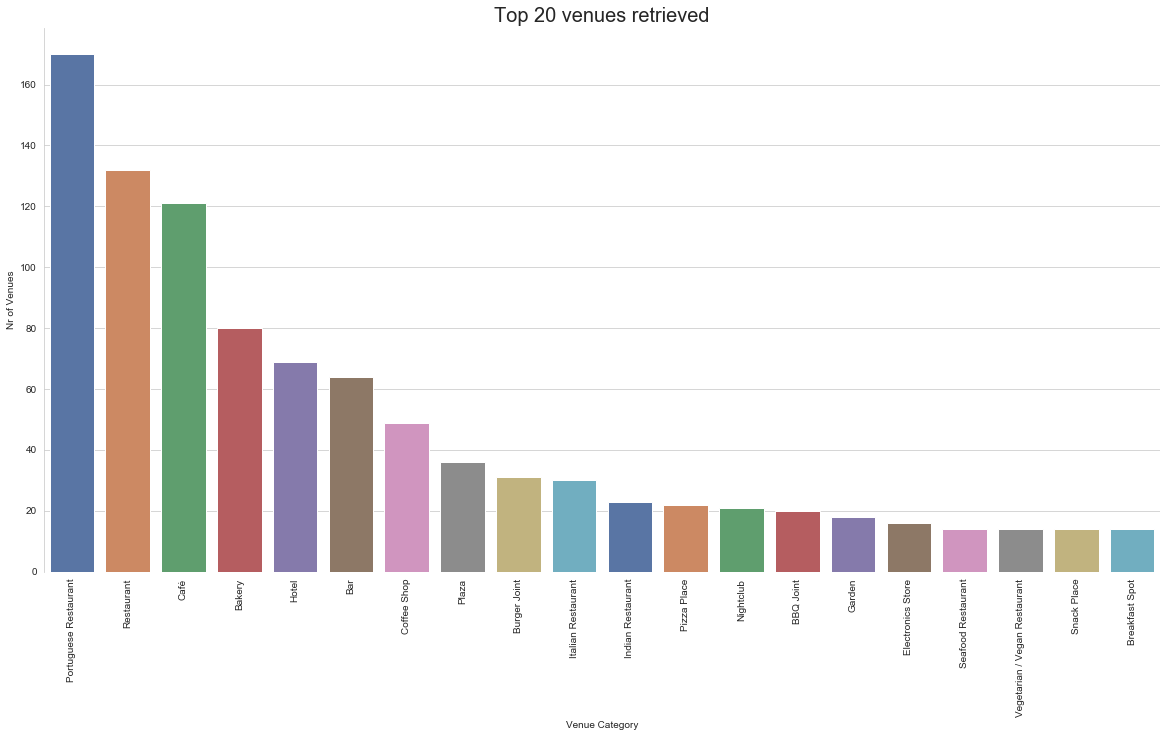

In [25]:
# Top 10 venues retrieved
fig = plt.figure(figsize=(20,10))
sb.set_style('whitegrid')
ax = sb.barplot(data=all_venues.groupby(by=['Venue Category']).count().sort_values(by='Venue', ascending=False).reset_index()[:20],
          x='Venue Category',
          y='Venue', palette='deep')
plt.xticks(rotation=90)
ax.set_title('Top 20 venues retrieved', fontsize=20)
ax.set_ylabel('Nr of Venues')
sb.despine(top=True, bottom=True, right=True)
plt.tight_layout
plt.show()

Appart from the 'Hotel', 'Plaza' and 'Park' and some others, every other category is food related. So I'll look into the Parent Categories now:

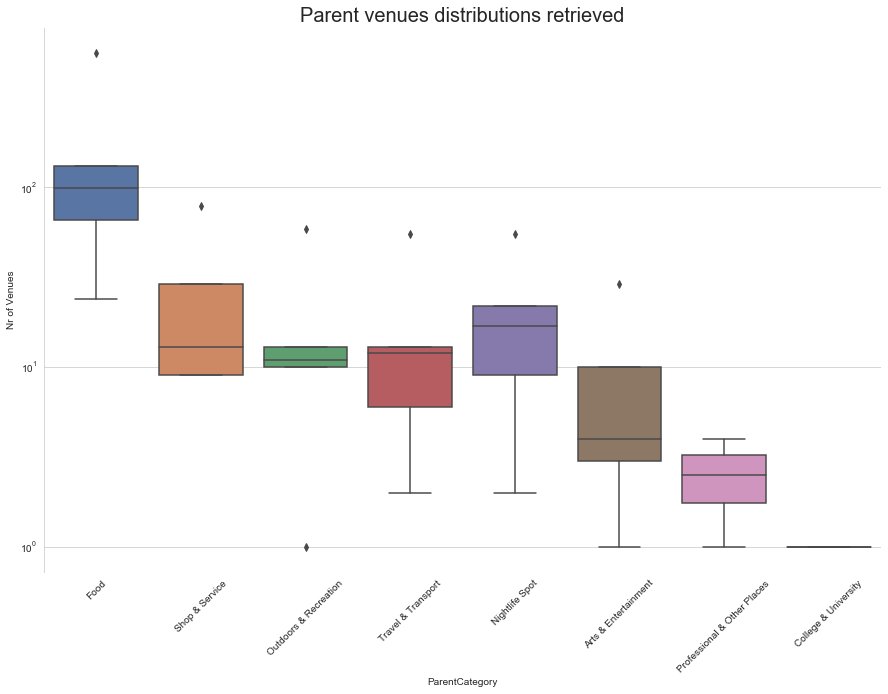

In [26]:
fig = plt.figure(figsize=(15,10))
ax = sb.boxplot(data=all_venues.groupby(by=['City','ParentCategory']).count().sort_values(by='Venue', ascending=False).reset_index(),
          x='ParentCategory',
          y='Venue', palette='deep')
plt.xticks(rotation=45)
ax.set_title('Parent venues distributions retrieved', fontsize=20)
ax.set_ylabel('Nr of Venues')
sb.despine(top=True, bottom=True, right=True)
plt.tight_layout
plt.yscale('log')
plt.show()

It seems best to use the Parent Categories. I only have 8 Categories and, besides the clear pattern of the food Category being the most frequent, I'll make more use of this level of information to better classify
any cluster returned by unsupervised learning.

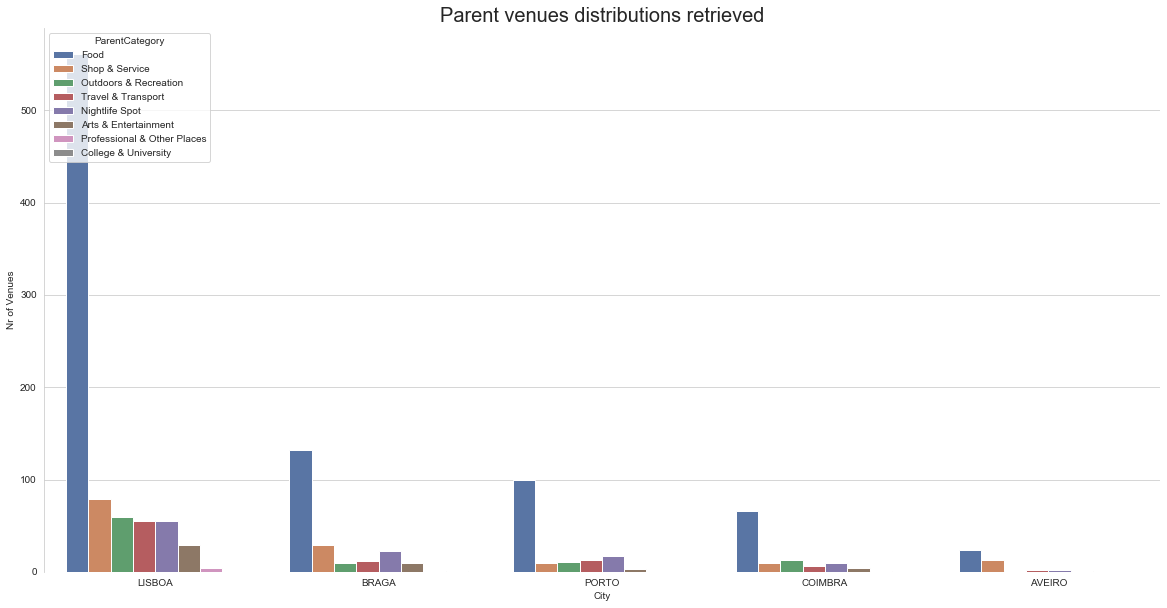

In [27]:
fig = plt.figure(figsize=(20,10))
ax = sb.barplot(data=all_venues.groupby(by=['City','ParentCategory']).count().sort_values(by=['Venue'], ascending=[False]).reset_index(),
          hue='ParentCategory',
          x='City',
          y='Venue', palette='deep')
ax.set_title('Parent venues distributions retrieved', fontsize=20)
ax.set_ylabel('Nr of Venues')
sb.despine(top=True, bottom=True, right=True)
plt.tight_layout
plt.show()

It looks like every city is a bit diferent from each other. Food Venues are the mode for each of them, only changing the proportion of other venues.

Now I'll encode the Parent Categories into dummy variables for each Neighborhood.

In [28]:
list_City_adresses = all_venues['City'].unique().tolist()
cities_dp = pd.get_dummies(all_venues[['ParentCategory']], prefix="", prefix_sep="")
cities_dp[['City', 'Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude']] = all_venues[['City', 'Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude']]
cities_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 12 columns):
Arts & Entertainment           1361 non-null uint8
College & University           1361 non-null uint8
Food                           1361 non-null uint8
Nightlife Spot                 1361 non-null uint8
Outdoors & Recreation          1361 non-null uint8
Professional & Other Places    1361 non-null uint8
Shop & Service                 1361 non-null uint8
Travel & Transport             1361 non-null uint8
City                           1361 non-null object
Neighborhood                   1361 non-null object
Neighborhood Latitude          1361 non-null float64
Neighborhood Longitude         1361 non-null float64
dtypes: float64(2), object(2), uint8(8)
memory usage: 53.2+ KB


And now I'll find the average of the distribution of categories for each neighborhood

In [29]:
cities_g_avg = cities_dp.groupby(by=['City', 'Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude']).mean().reset_index()
cities_g_avg.sample(5)

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
24,BRAGA,Mire de Tibães,41.565894,-8.478608,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0
70,PORTO,"Aldoar, Foz do Douro e Nevogilde",41.166173,-8.678074,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.0
54,LISBOA,Benfica,38.750410,-9.210688,0.0,0.0,0.400000,0.000000,0.200000,0.0,0.3,0.1
29,BRAGA,Priscos,41.490921,-8.469728,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0
3,AVEIRO,Oliveirinha,40.607447,-8.611250,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0


## 4. Analysis of data <a name="analysis"></a>
Now with all the data retrieved I will aplly unsupervised learning to identify clusters with similar kinds of venues per Neighborhood.

### 4.1 K-Means method <a name="kmeans"></a>
In order to achieve good clustering, first I need to fin the optimal number of clusters to do that.

In this stage I'm going to try to identify the right number of clusters based on the results of the K-means inertia graph (elbow method).

In [30]:
def plot_elbow_kmeans(df, max_ks=7):
    ks = np.arange(1, max_ks+1)
    inertias = []
    
    for k in ks:
        # Create a KMeans instance with k clusters: model
        t_model = KMeans(n_clusters=k, n_jobs=-1, n_init=30, random_state=123)
        # Fit model to samples
        t_model.fit(df.iloc[:,4:])
        # Append the inertia to the list of inertias
        inertias.append(t_model.inertia_)
    
    # Calculate the distance between line k1 to kmax and ki cluster
    x1, y1 = 1, inertias[0]
    x2, y2 = max_ks, inertias[-1]

    distances = []
    for i, v in enumerate(inertias):
        x0 = i+1
        y0 = v
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    df = pd.concat([pd.Series(ks, name='ks'), pd.Series(inertias, name='Inertia'), pd.Series(distances, name='Distance')], axis=1).set_index('ks')
    
    xmax = df['Distance'].idxmax()
    ymax = df['Distance'].max()
    dmax = df['Inertia'].loc[xmax]
    
    # Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
    fig = plt.figure(figsize=(10,5))
    ax = sb.lineplot(data=df)
    plt.axvline(xmax, c='r', ls=':')
    
    ax.annotate('Max Distance', xy=(xmax, ymax), xytext=(xmax+1, ymax+1),
            arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('Elbow at k:{}'.format(xmax), xy=(xmax, dmax), xytext=(xmax+1, dmax+1),
            arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.set_title('K-means Inertia Graph (Elbow method)', fontsize=16)
    ax.set_xlabel('Nr of Clusters', fontsize=12)
    plt.xticks(ks)
    
    plt.show()
    
    print('The best number of clusters is', xmax)
    
    return xmax

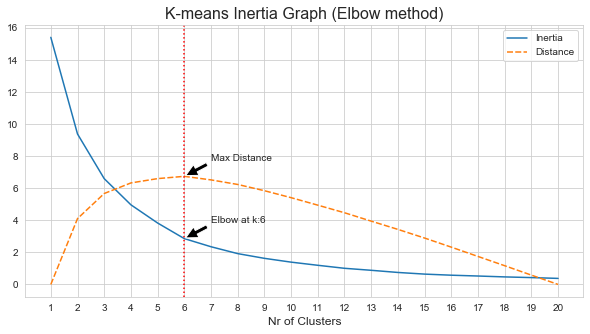

The best number of clusters is 6


In [31]:
ideal_clusters = plot_elbow_kmeans(cities_g_avg, 20)

The optimal number of clusters is not visually very clear, but measuring the distance of each cluster to a line between the fisrt cluster inertia to the last cluster inertia, we can mathematically find the best number of clusters

Now I need to profile each cluster (from the best number of clusters found before) to better understand the data.

In [32]:
# Run of the KMeans algorithm
f_model = KMeans(n_clusters=ideal_clusters, n_jobs=-1, n_init=30, random_state=123).fit(cities_g_avg.iloc[:,4:])

# Assign the labels to it's neighborhoods
cities_g_avg['Cluster'] = f_model.labels_

# Now a sample of the fitted clusters
cities_g_avg.sample(5)

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
70,PORTO,"Aldoar, Foz do Douro e Nevogilde",41.166173,-8.678074,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.000,0.0,4
43,COIMBRA,São Silvestre,40.292124,-8.424989,0.0,0.0,0.500000,0.000000,0.500000,0.0,0.000,0.0,4
6,AVEIRO,São Bernardo,40.617410,-8.624041,0.0,0.0,0.750000,0.000000,0.000000,0.0,0.250,0.0,2
30,BRAGA,"Real, Dume e Semelhe",41.557560,-8.444078,0.0,0.0,0.875000,0.000000,0.000000,0.0,0.125,0.0,0
41,COIMBRA,Santo António dos Olivais,40.218000,-8.405990,0.0,0.0,0.800000,0.000000,0.100000,0.0,0.100,0.0,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


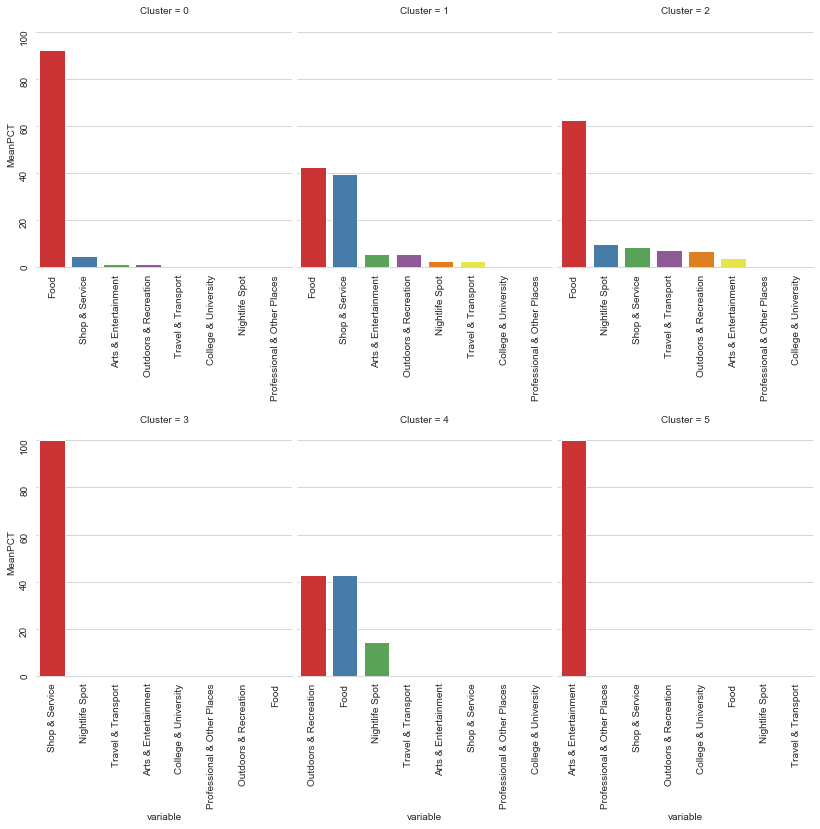

In [33]:
# build of a Cluster profiling dataframe
cluster_profile = pd.merge(cities_g_avg[['Neighborhood', 'Cluster']],
                          cities_dp,
                          on='Neighborhood').groupby(by='Cluster').mean().drop(['Neighborhood Latitude', 'Neighborhood Longitude'], axis=1)*100

# melt of the cluster profilig dataframe so seaborn can better help us to visualize it
cluster_melt = pd.melt(cluster_profile.reset_index(), id_vars='Cluster', value_name='MeanPCT')

g = sb.FacetGrid(data=cluster_melt.sort_values(by='MeanPCT',ascending=False), col='Cluster', col_wrap=int(ideal_clusters/2), sharex=False, height=5, aspect=0.8)
g.map(sb.barplot, 'variable', 'MeanPCT', palette='Set1')

sb.despine(top=True, right=True, left=True)

for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_rotation(90)
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.fig.subplots_adjust(wspace=.02, hspace=0.65)
plt.tight_layout

plt.show()

#### 4.1.2 Cluster Analysis
The classification of these clusters is very subjective, as I've decided to group venues by their parent category and not their current category. but we can still see diferent patterns along the clusters.

But this is not the point. Our function is to provide the best neighborhoods to our startup based on what it's important to its founders. This will be the following step:

In [34]:
# lets take into account the following categories as the most important to the startup.
important_categories = ['Arts & Entertainment', 
                        'Outdoors & Recreation', 
                        'Professional & Other Places', 
                        'Shop & Service',
                        'Travel & Transport']

# selection of only the clusters that have important categories
target_clusters = cluster_profile.apply(lambda x: np.where(x==0, np.nan, x))[important_categories].dropna().index.to_list()
print('The target clusters based on the categories {0}, are: {1})'.format(important_categories, target_clusters))

The target clusters based on the categories ['Arts & Entertainment', 'Outdoors & Recreation', 'Professional & Other Places', 'Shop & Service', 'Travel & Transport'], are: [2])


In [35]:
c_g_avg_kmeans = cities_g_avg[cities_g_avg['Cluster'].isin(target_clusters)]
pd.DataFrame(c_g_avg_kmeans.groupby(by=['Cluster', 'City'])['Neighborhood'].count()).rename(columns={'Neighborhood':'Nr_Neighborhood'})

Nr_Neighborhood
Cluster City                    
2       AVEIRO                 3
        BRAGA                  7
        COIMBRA                3
        LISBOA                19
        PORTO                  5

In [36]:
# Definition ot a centroid to help the plot of selected neighborhoods in a folium map
cent_lat = c_g_avg_kmeans['Neighborhood Latitude'].sum()/len(c_g_avg_kmeans['Neighborhood Latitude'])
cent_long = c_g_avg_kmeans['Neighborhood Longitude'].sum()/len(c_g_avg_kmeans['Neighborhood Longitude'])

In [65]:
# definition of the function to plot the neighborhoods
def plot_city_poi_clusters(latitude, longitude, df, z=9):
    map_poi = folium.Map(location=[latitude, longitude], zoom_start=z)
        
    # constrution of a color code for each cluster
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']
    a = np.sort(df['Cluster'].unique()).tolist()
    b = colors[:len(a)]
    color_code = dict(zip(a,b))
    
    # adding points to map
    for lat, lon, poi, cluster in zip(df['Neighborhood Latitude'],
                                      df['Neighborhood Longitude'], 
                                      df['Neighborhood'], 
                                      df['Cluster']):
        label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster), max_width=300,min_width=100, parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=color_code.get(cluster),
            fill=True,
            fill_color=color_code.get(cluster),
            fill_opacity=0.7).add_to(map_poi)
        
    return map_poi

In [67]:
plot_city_poi_clusters(cent_lat, # latitude
              cent_long, # longitude
              c_g_avg_kmeans, z=7)

Although we found target clusters of neighborhoods, the elbow method didn't show any abrupt change in inercia, also I can't, by this method, rule out possible neighborhoods that might be outliers and influence the overall results. So i'll try another way to identify the most similar clusters.

### 4.2 Sklean OPTICS <a name="optics"></a>
With OPTICS, an advanced algorithm that follows the same principles that of DBSCAN, will identify the right number of clusters and also identify any outliers based on every epsilon value.

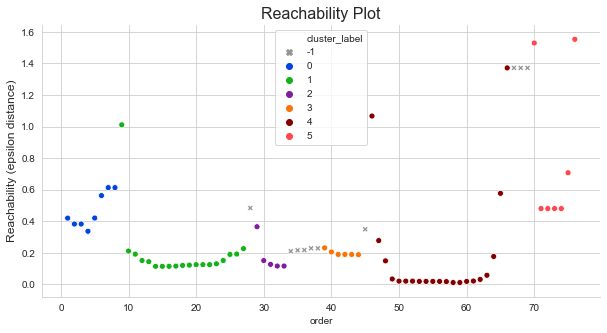

In [39]:
from sklearn.cluster import OPTICS
# run of the OPTICS algorithm
cluster_OPTICS = OPTICS(n_jobs=-1, algorithm = 'auto')

X = cities_g_avg.iloc[:,3:]
cluster_OPTICS.fit(X)

n_n = pd.Series(np.arange(len(X)), name='order')
reachability = pd.Series(cluster_OPTICS.reachability_[cluster_OPTICS.ordering_], name='reachability')
labels = pd.Series(cluster_OPTICS.labels_[cluster_OPTICS.ordering_], name='cluster_label').astype('category')
reach_data = pd.concat([n_n, reachability, labels], axis=1)
marks = ['X']
for i in labels.unique():
    marks.append('o')

# contrution of a dictionary of colors for each cluster
colors = ['grey', 'blue', 'green', 'purple', 'orange', 'dark red',
             'light red', 'beige', 'darkblue', 'darkgreen', 'cadet blue',
             'dark purple', 'off white', 'pink', 'lightblue', 'lightgreen',
             'red', 'black', 'light grey']
a = np.sort(labels.unique()).tolist()
b = colors[:len(a)]
color_code = dict(zip(a,b))

# Plot of the reachability plot
plt.figure(figsize=(10,5))
g = sb.scatterplot(data=reach_data, 
               x='order', 
               y='reachability', 
               style='cluster_label', 
               palette=sb.xkcd_palette(colors[:len(labels.unique())]), 
               markers=marks, 
               hue='cluster_label',
               legend='full')
g.set_ylabel('Reachability (epsilon distance)', fontsize=12)
g.set_title('Reachability Plot', fontsize=16)
sb.despine(top=True, right=True)
plt.show()

From the reachability plot we can identify nice cluster and the remainder as outliers. Let's look at a sample:

In [40]:
cities_g_avg['Cluster'] = cluster_OPTICS.labels_

# sample
cities_g_avg.sample(5)

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
34,BRAGA,Tadim,41.507680,-8.487787,0.000000,0.0,0.333333,0.000000,0.000000,0.0,0.666667,0.000000,0
61,LISBOA,Misericórdia,38.711880,-9.142968,0.025974,0.0,0.610390,0.142857,0.077922,0.0,0.077922,0.064935,1
73,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.146389,-8.614369,0.029851,0.0,0.611940,0.179104,0.074627,0.0,0.074627,0.029851,-1
68,LISBOA,São Domingos de Benfica,38.743330,-9.183706,0.100000,0.0,0.500000,0.000000,0.100000,0.0,0.300000,0.000000,0
41,COIMBRA,Santo António dos Olivais,40.218000,-8.405990,0.000000,0.0,0.800000,0.000000,0.100000,0.0,0.100000,0.000000,3


#### 4.2.1 Cluster Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


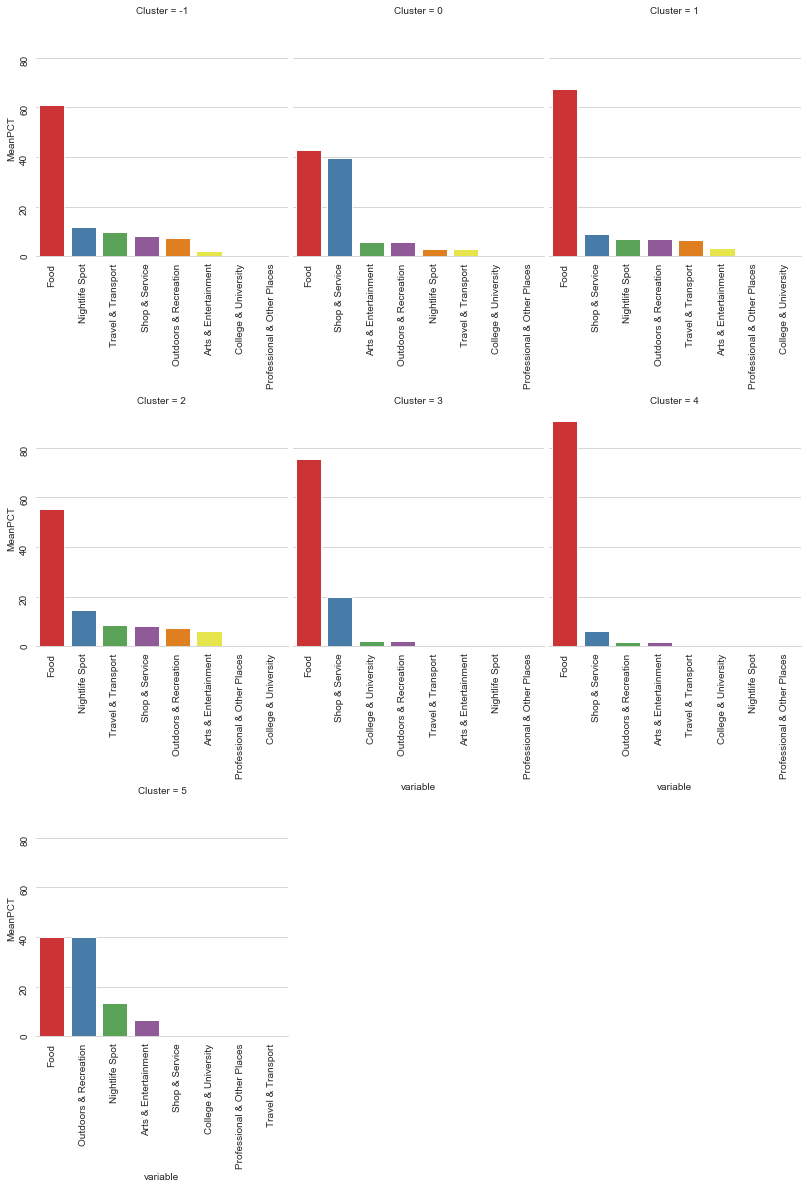

In [41]:
# build of a Cluster profiling dataframe
cluster_profile = pd.merge(cities_g_avg[['Neighborhood', 'Cluster']],
                          cities_dp,
                          on='Neighborhood').groupby(by='Cluster').mean().drop(['Neighborhood Latitude', 'Neighborhood Longitude'], axis=1)*100

# melt of the cluster profilig dataframe so seaborn can better help us to visualize it
cluster_melt = pd.melt(cluster_profile.reset_index(), id_vars='Cluster', value_name='MeanPCT')

g = sb.FacetGrid(data=cluster_melt.sort_values(by='MeanPCT',ascending=False), col='Cluster', col_wrap=int(ideal_clusters/2), sharex=False, height=5, aspect=0.8)
g.map(sb.barplot, 'variable', 'MeanPCT', palette='Set1')

sb.despine(top=True, right=True, left=True)

for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_rotation(90)
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.fig.subplots_adjust(wspace=.02, hspace=0.65)
plt.tight_layout

plt.show()

Based on what we stated at point 4.1.2, our function is to provide the best neighborhoods to our startup based on what it's important to its founders.

but we can clearly state that the clusters show us the following:
* Cluster nr -1: outliers (will not be used to make any decision)
* Clusters that do not fulfill the interests of the sart up company
* Target Clusters based on categories of interest to the start up company

In [42]:
# lets take into account the following categories as the most important to the startup.
important_categories = ['Arts & Entertainment', 
                        'Outdoors & Recreation', 
                        'Professional & Other Places', 
                        'Shop & Service',
                        'Travel & Transport']

# selection of only the clusters that have important categories
target_clusters = cluster_profile.drop(-1, axis=0).apply(lambda x: np.where(x==0, np.nan, x))[important_categories].dropna().index.to_list()
print('The target clusters based on the categories {0}, are: {1})'.format(important_categories, target_clusters))

The target clusters based on the categories ['Arts & Entertainment', 'Outdoors & Recreation', 'Professional & Other Places', 'Shop & Service', 'Travel & Transport'], are: [1, 2])


Taking into account the target clusters chosen before, as the most probable neighborhoods to establish a startup, let's ranks these (to a maximum of rank 3) with the Nomad List dataset

In [43]:
df = cities_g_avg[cities_g_avg['Cluster'].isin(target_clusters)][['City', 'Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Cluster']]
df_NL = pd.merge(df, NL_cities_norm[['City', 'NomadScore', 'CostPerMonth', 'Fun', 'StartupScore']].replace('LISBON', 'LISBOA'), on='City', how='inner')

# I'll define a composite score where i sum the nomad score, the fun factor, the startupscore and then substract the costpermonth
df_NL['RANK'] = (df_NL['NomadScore']+df_NL['Fun']+df_NL['StartupScore']-df_NL['CostPerMonth']).rank(method='dense', ascending=False).astype(int)
df_NL = df_NL.sort_values('RANK', ascending=True)
df_NL_final = df_NL[df_NL['RANK']<=3]
df_NL_final

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster,NomadScore,CostPerMonth,Fun,StartupScore,RANK
11,LISBOA,Beato,38.726295,-9.111918,1,1.000000,0.174854,0.75,1.0,1
21,LISBOA,Santa Maria Maior,38.709890,-9.133340,1,1.000000,0.174854,0.75,1.0,1
20,LISBOA,Santa Clara,38.780330,-9.160450,1,1.000000,0.174854,0.75,1.0,1
19,LISBOA,Penha de França,38.730210,-9.132729,1,1.000000,0.174854,0.75,1.0,1
18,LISBOA,Parque das Nações,38.768330,-9.097790,1,1.000000,0.174854,0.75,1.0,1
17,LISBOA,Olivais,38.783820,-9.118905,1,1.000000,0.174854,0.75,1.0,1
16,LISBOA,Misericórdia,38.711880,-9.142968,1,1.000000,0.174854,0.75,1.0,1
15,LISBOA,Lumiar,38.764110,-9.157000,1,1.000000,0.174854,0.75,1.0,1
14,LISBOA,Estrela,38.710068,-9.159096,1,1.000000,0.174854,0.75,1.0,1
13,LISBOA,Campo de Ourique,38.715810,-9.166920,1,1.000000,0.174854,0.75,1.0,1


Let's find the centroid coordinates so we can plot the Neighborhoods selected

In [44]:
cent_lat = df_NL_final['Neighborhood Latitude'].sum()/len(df_NL_final['Neighborhood Latitude'])
cent_long = df_NL_final['Neighborhood Longitude'].sum()/len(df_NL_final['Neighborhood Longitude'])

In [45]:
# definition of the function to plot the neighborhoods
def plot_city_poi_clusters_final(latitude, longitude, df, z=9):
    map_ranks = folium.Map(location=[latitude, longitude], zoom_start=z)
    
    # constrution of a dictionary for each cluster
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']
    a = np.sort(df['Cluster'].unique()).tolist()
    b = colors[:len(a)]
    color_code = dict(zip(a,b))
    
    # add points to map
    for lat, lon, poi, cluster, r in zip(df['Neighborhood Latitude'], 
                                         df['Neighborhood Longitude'],
                                         df['Neighborhood'], 
                                         df['Cluster'], 
                                         df['RANK']):
        label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' \(Rank: ' + str(r) + '\)', max_width=300,min_width=100, parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=color_code.get(cluster),
            fill=True,
            fill_color=color_code.get(cluster),
            fill_opacity=0.6).add_to(map_ranks)

    return map_ranks

In [46]:
plot_city_poi_clusters_final(cent_lat, # latitude
              cent_long, # longitude
              df_NL_final, z=8)

## 5. Results and Discussion <a name="discussion"></a>
The results obtained by the exploration of the datasets retrieved and the methedology are very peculiar. First, although not presented in this notebook, the time of the day and day of week change the amount and the categories retrieved by the Foursquare Explore Venues API. This fact leads me to advise a workday and during the day retrieval of the Venue's Data.

The profile of each city is very different on its venues, one hipotesis I have for further investigation is the fact that smaller cities might have less venues reported to Foursquare, therefore skewing the data to favor the main city (the capital of Portugal - Lisbon). This might not be a surprise if we check the world most popular cities with data on Foursquare.

Furthermore, the amount of venue unique categories is huge comparing to its parent categories. This fact leads me to consider the following scenarios:
* If we take into account every categorie we might force k-means or other unsuppervised learning technique into the 'Curse of Dimensionality', and identifying dissimilar neighborhoods into the same cluster.
* If we take into account only the parent categories, we might get a very good performing unsupervised learning technique but at the cost of loosing information.

Without any other data, like the real population for each neighborhood, the price of housing and commerce per square meter, the overall condition of the neighborhood in various dimensions, etc., might render this analisys dull and very broad. We might identify a neighborhood with all the required venues to a startup thrive, but those venues might have low ratings. The ratings for all the venues were not retrived because we need to have an advanced account of Foursquare Developer (paid), so it was far for the scope of this data science project.

After the run of K-Means we found clusters that were easy to tell the appart but somewaht difficult to give them a 'name'. This is also a symptom of the lack of information at the neighborhood level. The running of the OPTICS algorithm gave the ability to rule out neighborhoods that are very different form the others, so clustered as outliers. This helps on finding neighborhood that are similar in a realistic way, even with the lack of further information.

Finnaly the use of the Nomad List data, which is at the city level (not neighborhood) was an appropriate tool to rank the selected neighborhoods (those which had the venues and characteristics required for the establisment of the startup) in to a small list. This list of neighborhoods would be presented to the clients so they can make the best informed decision. The majority of neighborhoods presented were located at Lisbon, Porto and Aveiro.

## 6. Conclusion <a name="conclusion"></a>
The purpose of this project, was to broadly identify neighborhoods for a startup company to establish in Lisbon, Porto, Braga, Aveiro or Coimbra cities of Portugal. In order to make this identification we colected the needs and desires of that startup to match the best neighborhoods with the apropriated venues redtrived from the Foursquare Database. There were two aproaches to the clustering of the neighborhoods and the one being OPTICS because of its capability of identifying outliers. In the end we present a list of candidate neighborhoods to our clients to establish.

Altouhg the data is very dinamic, the decission selection the best location will be made by the client taking into consideration additional factors like attractiveness of each location, levels of noise or proximity to major roads, real estate availability and it's prices, social and economic dynamics of every neighborhood. The data retrieved in this project with the previous additional data could be presented as a list of variables from wich the Client could chose the most important, feed it to our OPTICS model, ranked by Nomad List and, finnaly, the presentation of a more refined and short list of the best neighborhood to setle the Startup